# Correlation Analysis and Forecasting



Loaded /Users/amankesarwani/PycharmProjects/cso-lab/data/synthetic/spot_series.csv -> 3000 rows, columns: ['spot', 'wti_spot']
Missing values per column:
spot        0
wti_spot    0
dtype: int64


/Users/amankesarwani/PycharmProjects/cso-lab/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


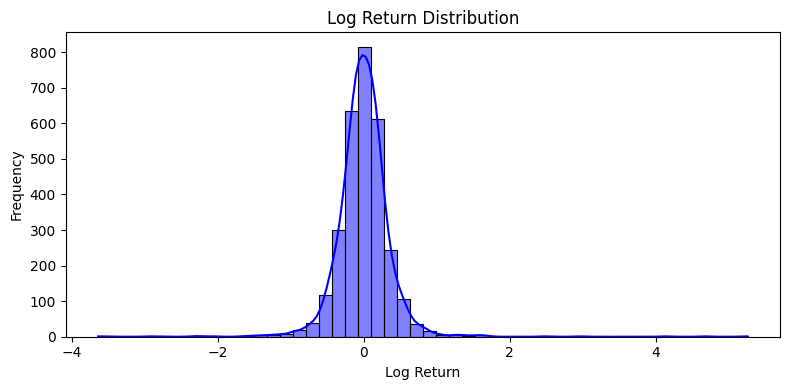

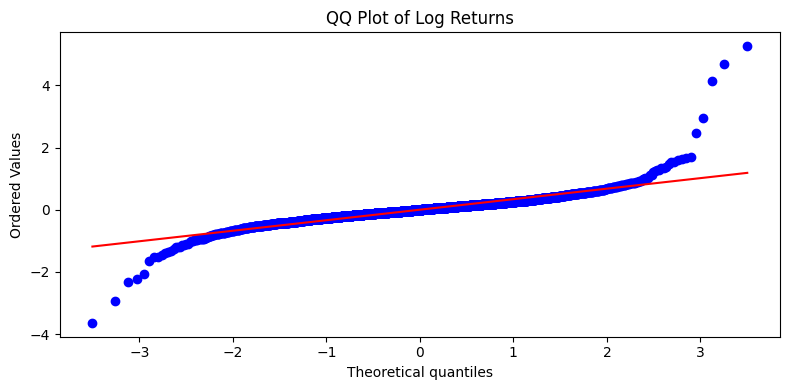

Rolling correlation saved to data/processed/realized_corr.csv


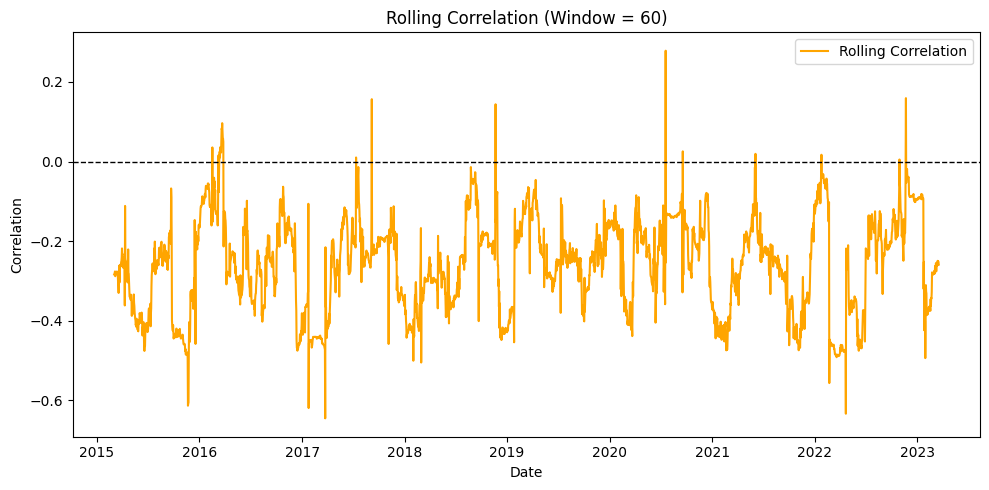

In [10]:
# Python
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from cso_lab.data import load_spot

# Load spot price data using load_spot
spot_data = load_spot('spot_series', verbose=True)

# Compute log returns
spot_data['log_return'] = np.log(spot_data['spot'] / spot_data['spot'].shift(1))
spot_data.dropna(inplace=True)

# Plot log return distribution
plt.figure(figsize=(8, 4))
sns.histplot(spot_data['log_return'], kde=True, bins=50, color='blue')
plt.title('Log Return Distribution')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# QQ plot for log returns
plt.figure(figsize=(8, 4))
stats.probplot(spot_data['log_return'], dist="norm", plot=plt)
plt.title('QQ Plot of Log Returns')
plt.tight_layout()
plt.show()

# Compute rolling correlation
window = 60  # Rolling window size
spot_data['rolling_corr'] = spot_data['log_return'].rolling(window).corr(spot_data['log_return'].shift(1))

# Save rolling correlation to CSV
project_root = '/Users/amankesarwani/PycharmProjects/cso-lab/'  # Use current working directory as project root
output_dir = 'data/processed'
# output_dir.mkdir(parents=True, exist_ok=True)  # Ensure directory exists
output_path = output_dir+'/realized_corr.csv'

spot_data[['rolling_corr']].dropna().to_csv(output_path)
print(f"Rolling correlation saved to {output_path}")

# Plot rolling correlation
plt.figure(figsize=(10, 5))
plt.plot(spot_data['rolling_corr'], label='Rolling Correlation', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Rolling Correlation (Window = 60)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
project_root

PosixPath('/Users/amankesarwani/PycharmProjects/cso-lab/notebooks')